In [17]:
"""3주차: 선형 회귀 전체 파이프라인 (당뇨병 데이터 버전).

3주차 차시 1~3에서 다루는 선형 회귀(Linear Regression) 회귀
실습 코드입니다.

데이터: sklearn.datasets.load_diabetes (당뇨병 진행도 예측)

Contents:
    1. 데이터 로드 및 탐색 (차시 2)
    2. 훈련/테스트 분리 (차시 2)
    3. 선형 회귀 모델 생성, 학습, 예측 (차시 2)
    4. 회귀 평가지표 계산 — MSE, RMSE, MAE, R² (차시 2)
    5. 훈련 vs 테스트 성능 비교 (차시 2)
    6. 학습된 계수 및 절편 확인 (차시 3)
    7. 다중공선성 점검 (차시 3)
    8. 잔차 분석 및 시각화 (차시 3)
"""

'3주차: 선형 회귀 전체 파이프라인 (당뇨병 데이터 버전).\n\n3주차 차시 1~3에서 다루는 선형 회귀(Linear Regression) 회귀\n실습 코드입니다.\n\n데이터: sklearn.datasets.load_diabetes (당뇨병 진행도 예측)\n\nContents:\n    1. 데이터 로드 및 탐색 (차시 2)\n    2. 훈련/테스트 분리 (차시 2)\n    3. 선형 회귀 모델 생성, 학습, 예측 (차시 2)\n    4. 회귀 평가지표 계산 — MSE, RMSE, MAE, R² (차시 2)\n    5. 훈련 vs 테스트 성능 비교 (차시 2)\n    6. 학습된 계수 및 절편 확인 (차시 3)\n    7. 다중공선성 점검 (차시 3)\n    8. 잔차 분석 및 시각화 (차시 3)\n'

# 3주차: 선형 회귀 전체 파이프라인
### 📊 데이터: 환자 건강 지표 → 당뇨병 진행도 예측
---
## 차시 1 핵심 요약 (이론)
- 선형 회귀 수식: **ŷ = w₁x₁ + w₂x₂ + … + wₙxₙ + b**
- 파라미터: 가중치(w)와 절편(b) — 학습 과정에서 데이터로부터 결정
- 손실 함수: **MSE**(Mean Squared Error) — 이것을 최소화하는 방향으로 학습
- 분류(k-NN) vs **회귀(선형 회귀)**: 타겟이 범주 → 분류, 연속형 숫자 → 회귀

---
## Step 1. 라이브러리 임포트

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

---
## Step 2. 데이터 로드 및 탐색
- **데이터**: sklearn 내장 `diabetes` 데이터셋
- **피처 (10개)**: age, sex, bmi, bp, s1~s6 (모두 정규화된 수치형)
- **타겟**: 1년 후 당뇨병 진행도 (연속형 숫자, 25~346)

In [19]:
data = load_diabetes()
X = data.data
y = data.target
feature_names = data.feature_names

print(f"피처 이름: {list(feature_names)}")
print(f"피처 shape: {X.shape}")
print(f"타겟 shape: {y.shape}")
print(f"타겟 범위: [{y.min():.0f}, {y.max():.0f}]")
print(f"타겟 평균 ± 표준편차: {y.mean():.1f} ± {y.std():.1f}")

피처 이름: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
피처 shape: (442, 10)
타겟 shape: (442,)
타겟 범위: [25, 346]
타겟 평균 ± 표준편차: 152.1 ± 77.0


In [20]:
# 타겟(당뇨병 진행도) 분포 확인
print("=== 타겟 기초 통계 ===")
print(f"  최솟값 : {y.min():.0f}")
print(f"  1사분위: {np.percentile(y, 25):.0f}")
print(f"  중앙값 : {np.median(y):.0f}")
print(f"  3사분위: {np.percentile(y, 75):.0f}")
print(f"  최댓값 : {y.max():.0f}")

=== 타겟 기초 통계 ===
  최솟값 : 25
  1사분위: 87
  중앙값 : 140
  3사분위: 212
  최댓값 : 346


In [21]:
# 피처 기초 통계 (처음 5개 샘플)
print("=== 피처 데이터 예시 (처음 5개) ===")
for i, name in enumerate(feature_names):
    print(f"  {name:>5}: {X[:5, i]}")

=== 피처 데이터 예시 (처음 5개) ===
    age: [ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306]
    sex: [ 0.05068012 -0.04464164  0.05068012 -0.04464164 -0.04464164]
    bmi: [ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
     bp: [ 0.02187239 -0.02632753 -0.00567042 -0.03665608  0.02187239]
     s1: [-0.0442235  -0.00844872 -0.04559945  0.01219057  0.00393485]
     s2: [-0.03482076 -0.01916334 -0.03419447  0.02499059  0.01559614]
     s3: [-0.04340085  0.07441156 -0.03235593 -0.03603757  0.00814208]
     s4: [-0.00259226 -0.03949338 -0.00259226  0.03430886 -0.00259226]
     s5: [ 0.01990749 -0.06833155  0.00286131  0.02268774 -0.03198764]
     s6: [-0.01764613 -0.09220405 -0.02593034 -0.00936191 -0.04664087]


---
## Step 3. 훈련/테스트 분리
- `test_size=0.3`: 전체의 30%를 테스트 세트로 분리
- `random_state=42`: 재현성(reproducibility)을 위한 랜덤 시드 고정

**왜 나누는가?** → 모델의 **일반화 성능**(새 데이터에서의 진짜 실력)을 측정하기 위해

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"훈련 세트: {X_train.shape[0]}개")
print(f"테스트 세트: {X_test.shape[0]}개")

훈련 세트: 309개
테스트 세트: 133개


---
## Step 4. 선형 회귀 모델 생성 · 학습 · 예측
- `LinearRegression()`: 모델 생성
- `fit()`: 훈련 데이터로 학습 (최적의 가중치 w, 절편 b를 찾음)
- `predict()`: 테스트 데이터에 대해 예측

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# 예측값 vs 실제값 비교 (처음 5개)
print(f"{'예측값':>10} | {'실제값':>10}")
print("-" * 25)
for pred, actual in zip(predictions[:5], y_test[:5]):
    print(f"{pred:>10.1f} | {actual:>10.1f}")

       예측값 |        실제값
-------------------------
     138.5 |      219.0
     181.1 |       70.0
     125.3 |      202.0
     292.8 |      230.0
     123.9 |      111.0


---
## Step 5. 회귀 평가지표 계산 — MSE, RMSE, MAE, R²

분류(k-NN)에서는 **정확도(accuracy)** 를 사용했지만,
회귀에서는 **오차의 크기**와 **설명력**으로 평가합니다.

| 지표 | 수식 | 의미 | 이상적 값 |
|:---:|:---:|:---:|:---:|
| **MSE** | Σ(y−ŷ)²/n | 오차 제곱의 평균 | 0에 가까울수록 |
| **RMSE** | √MSE | 원래 단위로 환산 | 0에 가까울수록 |
| **MAE** | Σ|y−ŷ|/n | 오차 절대값의 평균 | 0에 가까울수록 |
| **R²** | 1 − SS_res/SS_tot | 모델의 설명력 | 1에 가까울수록 |

In [24]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE  : {mae:.2f}")
print(f"R²   : {r2:.4f}")
print()
print(f"해석: 평균적으로 약 ±{rmse:.0f} 빗나가며,")
print(f"      타겟 변동의 {r2*100:.1f}%를 설명합니다.")

MSE  : 2821.75
RMSE : 53.12
MAE  : 41.92
R²   : 0.4773

해석: 평균적으로 약 ±53 빗나가며,
      타겟 변동의 47.7%를 설명합니다.


---
## Step 6. 훈련 성능 vs 테스트 성능 비교
- 훈련 성능: 이미 본 데이터에 대한 성능 (가짜 실력일 수 있음)
- 테스트 성능: 본 적 없는 데이터에 대한 성능 (진짜 실력)

| 패턴 | 훈련 R² | 테스트 R² | 진단 |
|------|---------|----------|------|
| 양호 | 높음 | 높음 (비슷) | ✓ |
| 과적합 | 높음 | 낮음 (gap 큼) | ⚠ |
| 과소적합 | 낮음 | 낮음 | ✗ |

In [25]:
train_predictions = model.predict(X_train)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)

test_mse = mse  # 이미 Step 5에서 계산
test_r2 = r2    # 이미 Step 5에서 계산

print(f"{'구분':<12} {'MSE':>10} {'RMSE':>10} {'R²':>10}")
print("-" * 45)
print(f"{'훈련 세트':<12} {train_mse:>10.2f} {np.sqrt(train_mse):>10.2f} {train_r2:>10.4f}")
print(f"{'테스트 세트':<12} {test_mse:>10.2f} {np.sqrt(test_mse):>10.2f} {test_r2:>10.4f}")
print()

gap = train_r2 - test_r2
print(f"R² 차이 (gap): {gap:.4f}")
if gap > 0.10:
    print("→ ⚠ 과적합 가능성")
elif gap < -0.05:
    print("→ ℹ 데이터 분할 편향 가능성")
else:
    print("→ ✓ 양호한 일반화 성능")

구분                  MSE       RMSE         R²
---------------------------------------------
훈련 세트           2924.05      54.07     0.5244
테스트 세트          2821.75      53.12     0.4773

R² 차이 (gap): 0.0471
→ ✓ 양호한 일반화 성능


---
## Step 7. 학습된 계수(w) 및 절편(b) 확인 (차시 3)

선형 회귀 수식: ŷ = w₁x₁ + w₂x₂ + … + w₁₀x₁₀ + b

- 계수 wₖ의 의미: **"다른 모든 피처를 고정한 상태에서"** 해당 피처가 1단위 변할 때 타겟의 변화량
- 계수가 **양수** → 피처 증가 시 타겟 증가
- 계수가 **음수** → 피처 증가 시 타겟 감소

⚠ **주의**: 피처의 스케일이 다르면 계수 크기를 직접 비교할 수 없음

In [26]:
# 계수를 절대값 기준 내림차순 정렬
sorted_indices = np.argsort(np.abs(model.coef_))[::-1]

print(f"{'피처':<8} {'계수':>12} {'|계수|':>10}  방향")
print("-" * 42)
for idx in sorted_indices:
    name = feature_names[idx]
    coef = model.coef_[idx]
    direction = "▲ 양(+)" if coef > 0 else "▼ 음(−)"
    print(f"{name:<8} {coef:>12.2f} {abs(coef):>10.2f}  {direction}")
print("-" * 42)
print(f"{'절편(b)':<8} {model.intercept_:>12.2f}")

피처                 계수       |계수|  방향
------------------------------------------
s1            -901.96     901.96  ▼ 음(−)
s5             659.27     659.27  ▲ 양(+)
bmi            546.30     546.30  ▲ 양(+)
s2             506.76     506.76  ▲ 양(+)
bp             388.40     388.40  ▲ 양(+)
s4             288.04     288.04  ▲ 양(+)
sex           -261.71     261.71  ▼ 음(−)
s3             121.15     121.15  ▲ 양(+)
s6              41.38      41.38  ▲ 양(+)
age             29.25      29.25  ▲ 양(+)
------------------------------------------
절편(b)          151.01


In [27]:
# 핵심 해석
pos_indices = [i for i in sorted_indices if model.coef_[i] > 0]
neg_indices = [i for i in sorted_indices if model.coef_[i] < 0]

print("핵심 해석 (다른 피처를 고정했을 때):")
if pos_indices:
    top_pos = pos_indices[0]
    print(f"  가장 큰 양수 계수 → {feature_names[top_pos]} ({model.coef_[top_pos]:+.1f})")
if neg_indices:
    top_neg = neg_indices[0]
    print(f"  가장 큰 음수 계수 → {feature_names[top_neg]} ({model.coef_[top_neg]:+.1f})")

핵심 해석 (다른 피처를 고정했을 때):
  가장 큰 양수 계수 → s5 (+659.3)
  가장 큰 음수 계수 → s1 (-902.0)


---
## Step 8. 다중공선성 점검 (차시 3)

피처 간 **상관계수**가 높으면(다중공선성) 개별 계수 추정이 불안정해집니다.

| 상관계수 |r| | 해석 |
|:---------:|:---:|
| 0.0 ~ 0.3 | 약한 상관 |
| 0.3 ~ 0.5 | 보통 상관 |
| 0.5 ~ 0.7 | 강한 상관 ⚠ |
| 0.7 ~ 1.0 | 매우 강한 상관 ⚠⚠ |

In [28]:
# 피처 간 상관계수 행렬 계산
corr_matrix = np.corrcoef(X.T)

# |r| > 0.5인 피처 쌍 탐색
threshold = 0.5
pairs = []

for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        r = corr_matrix[i, j]
        if abs(r) > threshold:
            pairs.append((feature_names[i], feature_names[j], r))

pairs.sort(key=lambda t: abs(t[2]), reverse=True)

print(f"상관이 높은 피처 쌍 (|r| > {threshold}):")
print("-" * 35)
if pairs:
    for a, b, r in pairs:
        print(f"  {a:>5} ↔ {b:<5}  r = {r:+.3f}")
else:
    print("  (없음)")
print()
print("주의: 상관이 높은 피처 쌍이 있으면 개별 계수 해석이")
print("      불안정해질 수 있습니다 (다중공선성).")

상관이 높은 피처 쌍 (|r| > 0.5):
-----------------------------------
     s1 ↔ s2     r = +0.897
     s3 ↔ s4     r = -0.738
     s2 ↔ s4     r = +0.660
     s4 ↔ s5     r = +0.618
     s1 ↔ s4     r = +0.542
     s1 ↔ s5     r = +0.516

주의: 상관이 높은 피처 쌍이 있으면 개별 계수 해석이
      불안정해질 수 있습니다 (다중공선성).


---
## Step 9. 시각화 — 예측 성능 진단 (차시 3)
- **Actual vs Predicted**: 대각선(빨간 점선)에 가까울수록 좋은 예측
- **Residual Plot**: 잔차가 0 주위에 무작위로 분포해야 선형 모델 가정 충족
- **Residual Distribution**: 정규 분포에 가까울수록 양호

### 잔차(Residual)란?
잔차 = 실제값 − 예측값. 모델이 **놓친 부분**을 의미합니다.

| 잔차 패턴 | 의미 |
|:---------:|:---:|
| 무작위 분포 | ✓ 선형 모델 적합 |
| 패턴 있음 (곡선 등) | ⚠ 비선형 관계 존재 |
| 깔때기 형태 | ⚠ 이분산성(등분산 가정 위반) |

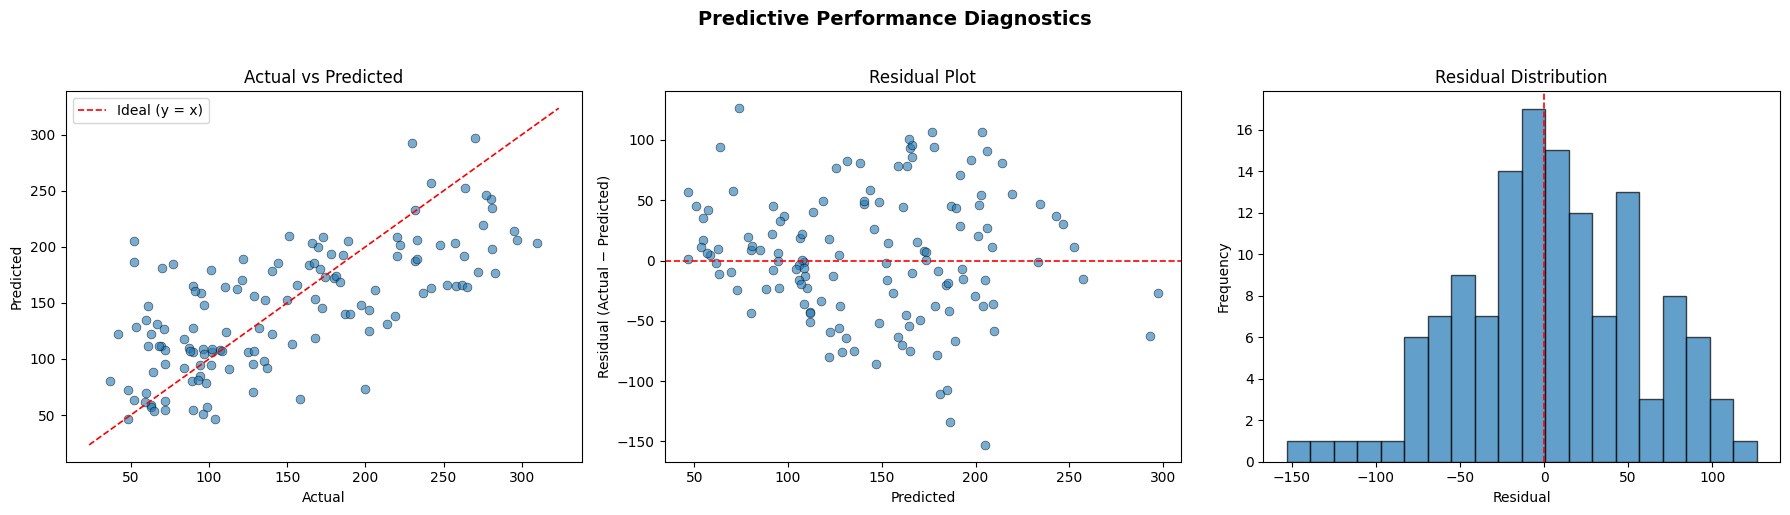

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# (1) Actual vs Predicted
axes[0].scatter(y_test, predictions, alpha=0.6, edgecolors="k", linewidths=0.5, s=40)
lo = min(y_test.min(), predictions.min())
hi = max(y_test.max(), predictions.max())
margin = (hi - lo) * 0.05
axes[0].plot([lo - margin, hi + margin], [lo - margin, hi + margin],
             "r--", linewidth=1.2, label="Ideal (y = x)")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")
axes[0].set_title("Actual vs Predicted")
axes[0].legend(loc="upper left")

# (2) Residual Plot
residuals = y_test - predictions
axes[1].scatter(predictions, residuals, alpha=0.6, edgecolors="k", linewidths=0.5, s=40)
axes[1].axhline(0, color="r", linestyle="--", linewidth=1.2)
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Residual (Actual − Predicted)")
axes[1].set_title("Residual Plot")

# (3) Residual Distribution
axes[2].hist(residuals, bins=20, edgecolor="k", alpha=0.7)
axes[2].axvline(0, color="r", linestyle="--", linewidth=1.2)
axes[2].set_xlabel("Residual")
axes[2].set_ylabel("Frequency")
axes[2].set_title("Residual Distribution")

fig.suptitle("Predictive Performance Diagnostics", fontsize=14, fontweight="bold", y=1.02)
fig.tight_layout()
plt.show()

---
## Step 10. 시각화 — 계수 크기 & 피처 상관관계

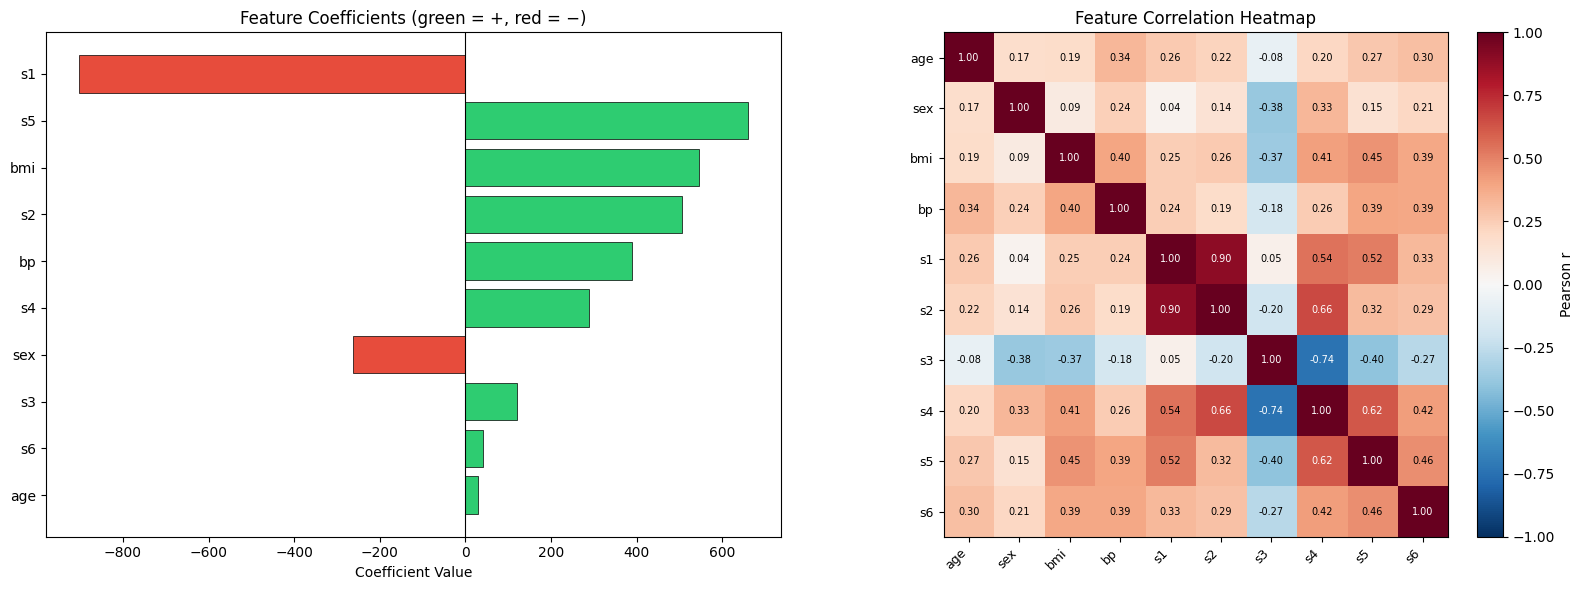

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# (1) 피처 계수 수평 막대 그래프
indices = sorted_indices[::-1]  # 작은 값 위로
names = [feature_names[i] for i in indices]
values = model.coef_[indices]
colors = ["#e74c3c" if v < 0 else "#2ecc71" for v in values]

axes[0].barh(names, values, color=colors, edgecolor="k", linewidth=0.5)
axes[0].axvline(0, color="k", linewidth=0.8)
axes[0].set_xlabel("Coefficient Value")
axes[0].set_title("Feature Coefficients (green = +, red = −)")

# (2) 상관계수 히트맵
n = len(feature_names)
im = axes[1].imshow(corr_matrix, cmap="RdBu_r", vmin=-1, vmax=1, aspect="equal")
axes[1].set_xticks(range(n))
axes[1].set_yticks(range(n))
axes[1].set_xticklabels(feature_names, rotation=45, ha="right", fontsize=9)
axes[1].set_yticklabels(feature_names, fontsize=9)
for i in range(n):
    for j in range(n):
        val = corr_matrix[i, j]
        color = "white" if abs(val) > 0.6 else "black"
        axes[1].text(j, i, f"{val:.2f}", ha="center", va="center",
                     fontsize=7, color=color)
plt.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04, label="Pearson r")
axes[1].set_title("Feature Correlation Heatmap")

fig.tight_layout()
plt.show()

---
## Step 11. 최종 요약

In [31]:
print(f"테스트 MSE  : {mse:.2f}")
print(f"테스트 RMSE : {rmse:.2f}")
print(f"테스트 MAE  : {mae:.2f}")
print(f"테스트 R²   : {r2:.4f}")
print(f"R² gap      : {gap:.4f}")
print()
print("주요 학습 내용:")
print("  1. 회귀 평가지표: MSE, RMSE, MAE, R²")
print("  2. 계수의 조건부 해석: \"다른 피처를 고정했을 때\"")
print("  3. 다중공선성: 피처 간 높은 상관 → 계수 해석 주의")
print("  4. 잔차 분석: 잔차의 무작위 분포 여부 확인")
print()
print("⚠ 주의: 이 결과는 random_state=42에서의 단일 분할 결과입니다.")
print("  random_state를 바꾸면 R²와 계수 값도 달라질 수 있습니다.")
print("  더 안정적인 평가 → 4주차 교차검증(Cross-Validation)")

테스트 MSE  : 2821.75
테스트 RMSE : 53.12
테스트 MAE  : 41.92
테스트 R²   : 0.4773
R² gap      : 0.0471

주요 학습 내용:
  1. 회귀 평가지표: MSE, RMSE, MAE, R²
  2. 계수의 조건부 해석: "다른 피처를 고정했을 때"
  3. 다중공선성: 피처 간 높은 상관 → 계수 해석 주의
  4. 잔차 분석: 잔차의 무작위 분포 여부 확인

⚠ 주의: 이 결과는 random_state=42에서의 단일 분할 결과입니다.
  random_state를 바꾸면 R²와 계수 값도 달라질 수 있습니다.
  더 안정적인 평가 → 4주차 교차검증(Cross-Validation)
